## Variable distributions and their effects on Models

Reference 
[https://www.statisticssolutions.com/homoscedasticity/]

### Linear Regression Assumptions

- Linear relationship with the outcome Y
- Homoscedasticity
- Normality
- No Multicollinearity 

## Linear Assumption

- The X variable is linearly related to the dataset 
- Pearson correlation coefficient can determine the linearity magnitude  between variables 

## Normality Assumption

- The variable X follows a normal or gaussian distribution

## Homoscedasticity Assumption

- Homogeneity of variance

- Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables


### Unaffected models

- Neural Networks
- Support Vector Machines
- Trees



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set()
import pandas as pd



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [3]:
dataset.data.shape

(506, 13)

In [4]:
dataset.target.shape

(506,)

## Quantile transform

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

Reference: https://scikit-learn.org/

In [0]:
from sklearn.preprocessing import QuantileTransformer, quantile_transform
X = dataset.data
y = dataset.target
y_temp = quantile_transform(y.reshape(-1,1),
                                n_quantiles=300,
                                output_distribution='normal',
                                copy=True)

y_processed = y

X_processed = X

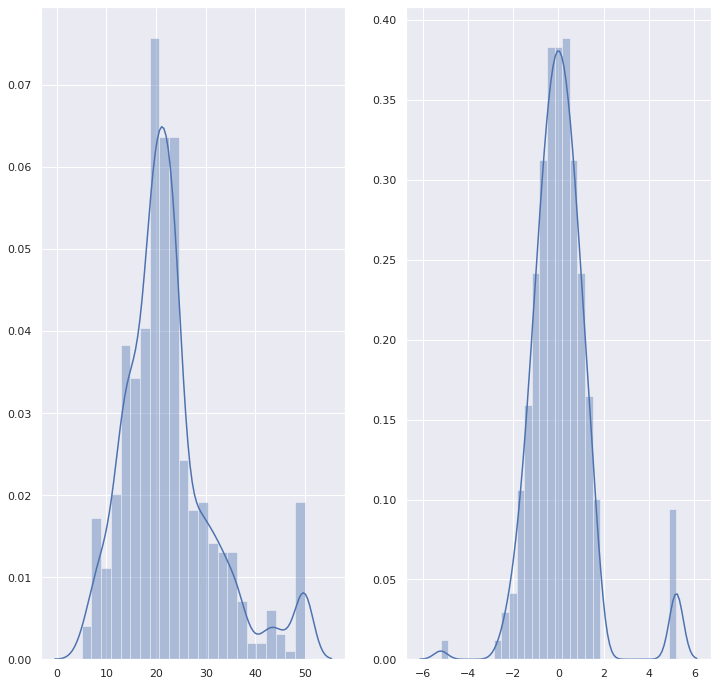

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,12))
sns.distplot(y, ax=ax[0])
sns.distplot(y_temp, ax=ax[1])

In [7]:
X.shape

(506, 13)

## Effect on Models

In [9]:
sum(np.isnan(X))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [11]:
X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(X_processed,
                                                    y_processed,
                                                    test_size=0.2)

X_train_processed.shape, X_test_processed.shape

((404, 13), (102, 13))

In [0]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
X_train = obj.fit_transform(X_train)
X_test = obj.transform(X_test)

In [0]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
X_train_processed = obj.fit_transform(X_train_processed)
X_test_processed = obj.transform(X_test_processed)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))


34.37186274509803
25.614901960784316


In [16]:
from sklearn.linear_model import RidgeCV
model = RidgeCV()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))



34.14833333333333
24.75803921568628


In [17]:
from sklearn.linear_model import Ridge
model = RidgeCV()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))



34.14833333333333
24.75803921568628


In [18]:
from sklearn.svm import SVR
model = SVR()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))



9.881666666666666
7.8090196078431395


In [19]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))

14.846372549019605
24.850196078431374


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [20]:
from sklearn.svm import LinearSVR
model = LinearSVR()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))

13.156176470588235
14.601176470588234


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))

16.979705882352945
16.403137254901967


In [22]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))

16.150294117647057
22.289411764705882


In [23]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))


28.87578431372549
24.04235294117647
